In [16]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import nltk
from collections import defaultdict

## Impact matrices per model

In [2]:
model = 'gpt2'
def open_pkl_result(metric, layer):
    with open(f'results/{model}_{metric}_{layer}.pkl', 'rb') as f:
        # data is a list with sentences: 
        # each sentence consists of (sentence, tokenized_text, impact matrix, tree2list, nltk_tree)
        data = pickle.load(f)
    
    return data

In [3]:
def plot_confusion_matrix(cm, swapped_vocab):
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    # ax.figure.colorbar(im, ax=ax)

    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=swapped_vocab.values(), yticklabels=swapped_vocab.values(),
           title='Confusion Matrix: relative shared levels',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(round(cm[i, j], 2)) if cm[i, j] != 0 else '0',
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.savefig('/Users/sperdijk/Documents/Master/Jaar_3/Thesis/thesis_code' + '/results/shared_levels/confusion_matrix.png')

In [9]:
def visualize_impact_matrix(sentence, imatrix, layer):
    fig, ax = plt.subplots()
    im = ax.imshow(imatrix, interpolation='nearest', cmap='YlGnBu')
    ax.figure.colorbar(im, ax=ax)

        # We want to show all ticks...
    ax.set(xticks=np.arange(imatrix.shape[1]),
           yticks=np.arange(imatrix.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=sentence, yticklabels=sentence,
           title='Impact matrix of sentence at layer ' + str(layer))
    
    ax.set_ylabel('Prediction of ...')
    ax.set_xlabel('Influence of ... on the prediction')
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    fig.tight_layout()

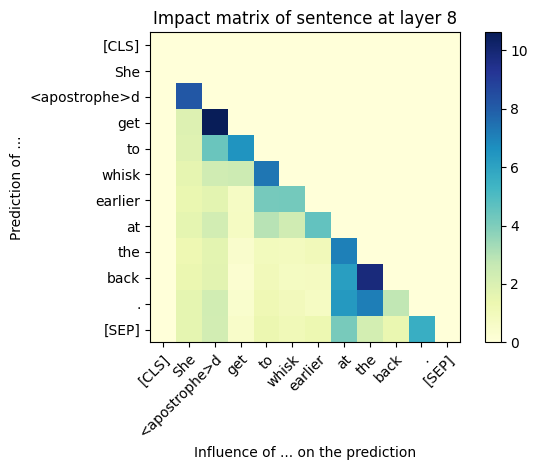

In [10]:
metric = 'dist'
layer = 8
data = open_pkl_result(metric, layer)[0]
sentence, imatrix = data[1], data[2]

visualize_impact_matrix(sentence, imatrix, layer)

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_all_layer_matrices(sentence, matrices):
    # Set up a 2x4 grid for the heatmaps
    fig, axs = plt.subplots(2, 4, figsize=(22, 10))
    
    # Ensure axs is a 2D array for easy indexing, even if there's only one row/column
    axs = axs.reshape(2, 4)
    
    for idx, ax in enumerate(axs.flat):
        # Get the current matrix
        imatrix = matrices[idx]
        
        # Create heatmap
        im = ax.imshow(imatrix, interpolation='nearest', cmap='YlGnBu')
        
        # Set tick marks and labels
        ax.set(xticks=np.arange(imatrix.shape[1]),
               yticks=np.arange(imatrix.shape[0]),
               xticklabels=sentence, yticklabels=sentence)
        
        # Rotate the tick labels for better layout
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        
        # Optional: Set a title for each subplot to differentiate, e.g., by layer number
        ax.set_title(f'Layer {idx+1}')
    
    fig.supxlabel('Influence of ... on the prediction', fontsize=14)
    fig.supylabel('Prediction of ...', fontsize=14)

    # Adjust layout to prevent overlap
    fig.tight_layout()
    
    # Add a colorbar to the right of the grid. This adds a colorbar for the last plot,
    # but you might want to adjust or add a common colorbar for all.
    fig.colorbar(im, ax=axs, orientation='vertical', fraction=.1)

In [34]:
metric = 'dist'
all_matrices = []
for i in range(1, 9):
    data = open_pkl_result(metric, i)[0]
    sentence, imatrix = data[1], data[2]
    all_matrices.append(imatrix)

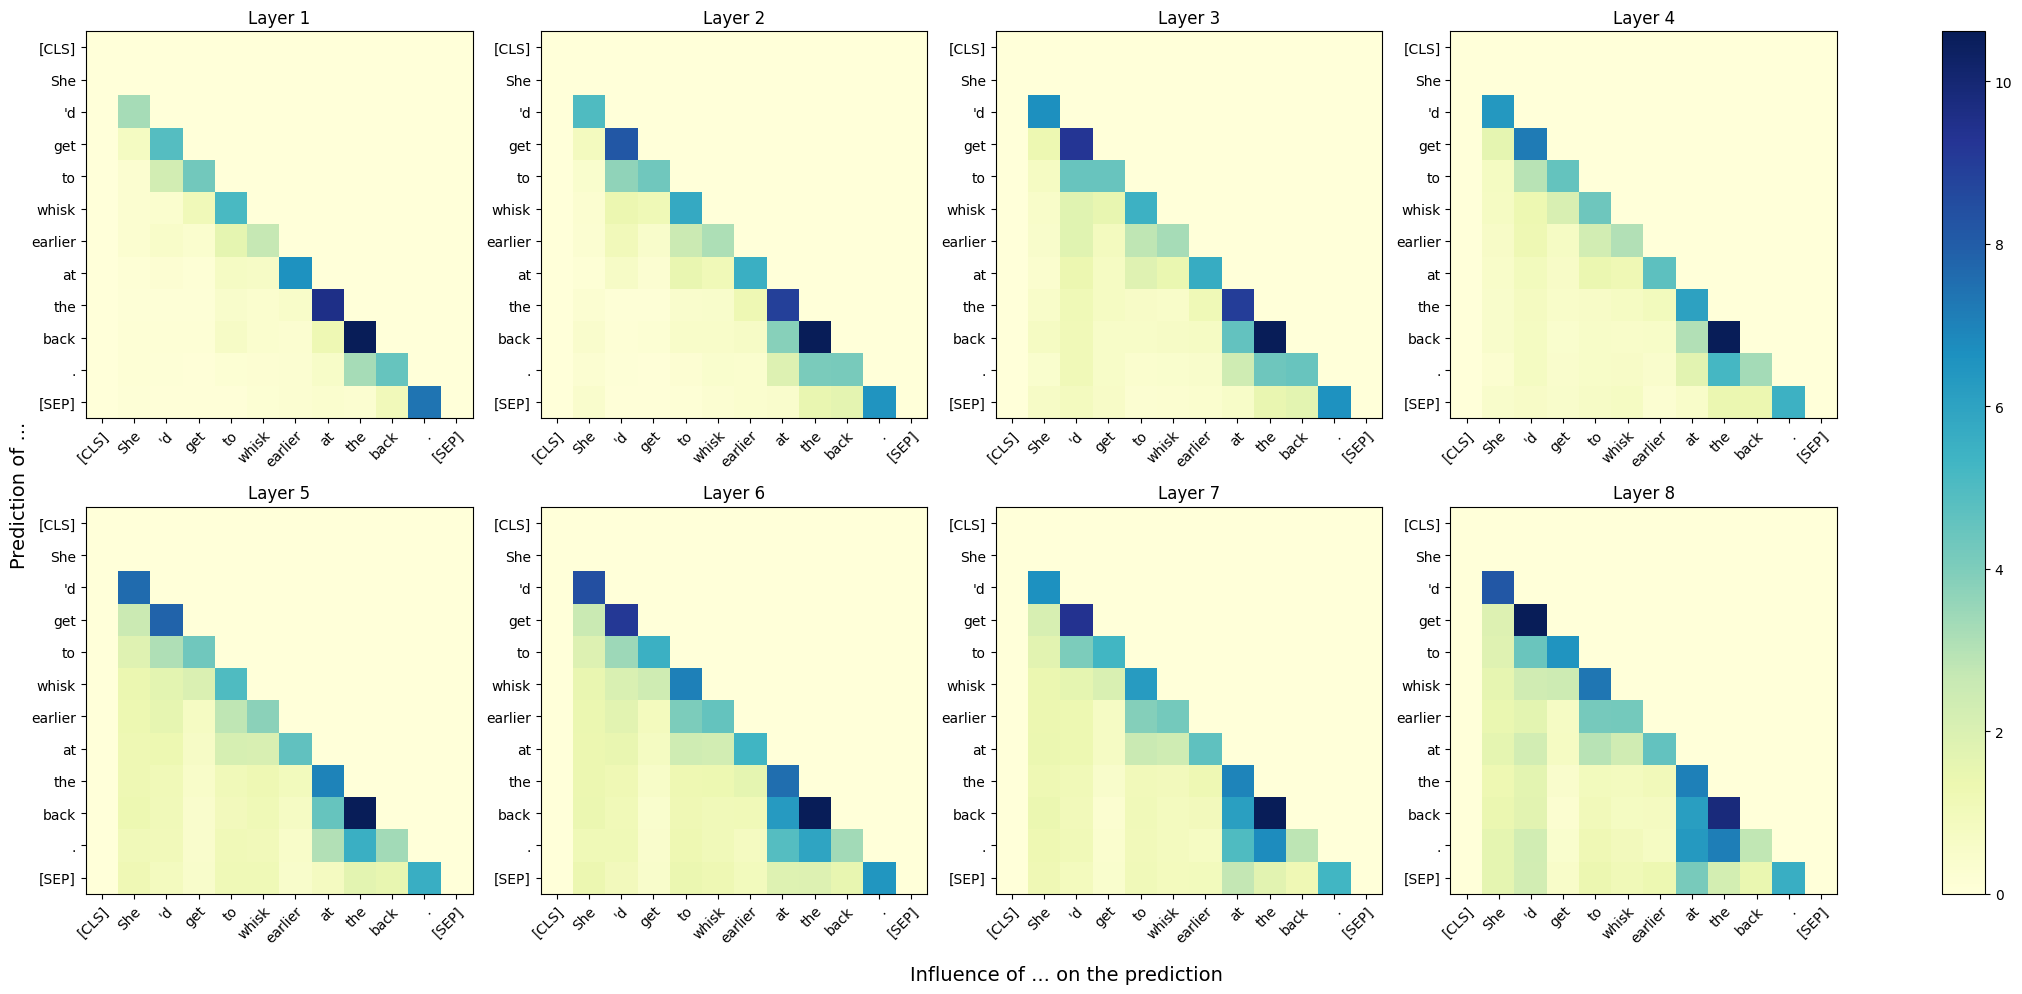

In [35]:
sentence[2] = "'d"
visualize_all_layer_matrices(sentence, all_matrices)

## Spearman correlation

Spearman correlation are for the similarities between predicted trees and gold trees

In [69]:
def open_spearmann_resultfile(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    
    return data

In [70]:
filename = f'results/spearman_dist_all.pkl'
spearman_data = open_spearmann_resultfile(filename)
spearman_data

{'deberta': [(0.47266254076315356, 0.1634713308003209),
  (0.4971603194795072, 0.15411890349758206),
  (0.5074292139524706, 0.14309572783985242),
  (0.4995044357131044, 0.14672281632469011),
  (0.494138674837841, 0.14972078010697593),
  (0.4916793619274196, 0.15162965715437193),
  (0.496852071390417, 0.1489383268075613),
  (0.4996809357291788, 0.14808100939249316),
  (0.49779136218243875, 0.14910220569105406)],
 'gpt2': [(0.47266254076315356, 0.1634713308003209),
  (0.5008463323178525, 0.1468231883350638),
  (0.500759577736112, 0.1467774460471787),
  (0.5005243783845815, 0.14689706257203128),
  (0.5006392716960119, 0.14686785161236957),
  (0.5019775961879158, 0.14617550709466418),
  (0.5033503376666629, 0.1451873670540362),
  (0.50258547753921, 0.14523623582243606),
  (0.5091398925468793, 0.1411995160099522)]}

In [73]:
zip(*spearman_data['deberta'])

In [74]:
def plot_spearman_results(spearman_data):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(range(len(spearman_data['deberta'])), list(zip(*spearman_data['deberta']))[0], label='deberta')
    ax.plot(range(len(spearman_data['gpt2'])), list(zip(*spearman_data['gpt2']))[0], label='gpt2')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Spearman correlation (-1 < r < 1)')
    ax.set_title('Spearman correlation')
    ax.legend()
    plt.show()

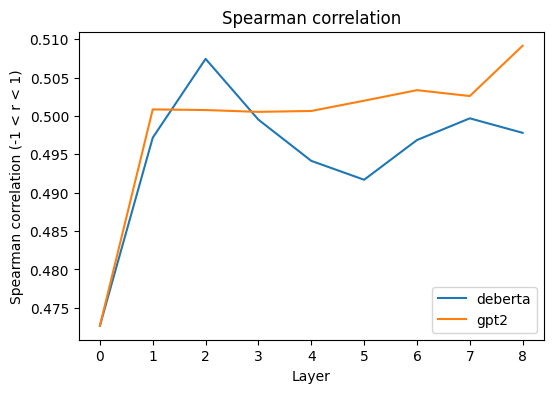

In [75]:
plot_spearman_results(spearman_data)

## Quantitative analysis MLM and CLM

In [62]:
def open_pkl_result(model, layer):
    with open(f'results/i_matrices/{model}_dist_{layer}.pkl', 'rb') as f:
        # data is a list with sentences: 
        # each sentence consists of (sentence, tokenized_text, impact matrix, tree2list, nltk_tree)
        data = pickle.load(f)
    
    return data

In [63]:
def get_all_results():
    mlm_clm_results = {'gpt2' : {}, 'deberta' : {}}

    for model in ['gpt2', 'deberta']:
        for layer in range(1, 9):
            data = open_pkl_result(model, layer)
            mlm_clm_results[model][layer] = data
    
    return mlm_clm_results

In [64]:
def get_diff_only_lower(mlm_clm_results):
    diff_per_layer = defaultdict(list)
    for i, (clm_layers, mlm_layers) in enumerate(zip(mlm_clm_results['gpt2'].values(), mlm_clm_results['deberta'].values())):
        for s in range(len(clm_layers)):
            # set values upper triangle to 0
            below_mlm = np.tril(mlm_layers[s][2], k=-1)
            diff_per_layer[i].append(np.mean(np.abs(clm_layers[s][2] - below_mlm)))
    return diff_per_layer

In [65]:
def get_diff_mean_mlm(mlm_clm_results):
    diff_per_layer = defaultdict(list)
    for i, (clm_layers, mlm_layers) in enumerate(zip(mlm_clm_results['gpt2'].values(), mlm_clm_results['deberta'].values())):
        for s in range(len(clm_layers)):
            # mean of upper & lower triangle
            mean_triangles = (np.triu(mlm_layers[s][2], k=1).T + np.tril(mlm_layers[s][2], k=-1)) / 2
            diff_per_layer[i].append(np.mean(np.abs(clm_layers[s][2] - mean_triangles)))
            
    return diff_per_layer

In [66]:
def plot_diff_per_layer(diff_per_layer):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(range(len(diff_per_layer)), [np.mean(diff_per_layer[i]) for i in range(len(diff_per_layer))])
    ax.set_xlabel('Layer')
    ax.set_ylabel('Mean difference')
    ax.set_title('Mean difference between MLM and CLM')
    plt.show()

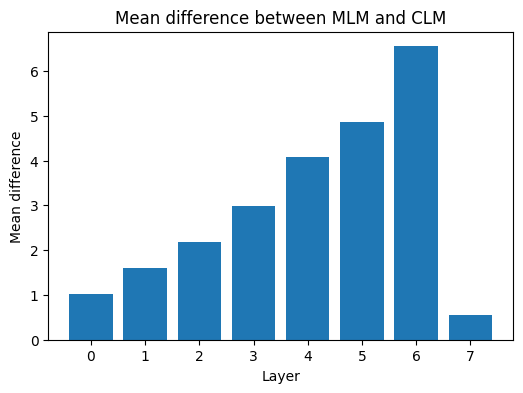

In [67]:
results = get_all_results()
diff = get_diff_mean_mlm(results)
plot_diff_per_layer(diff)

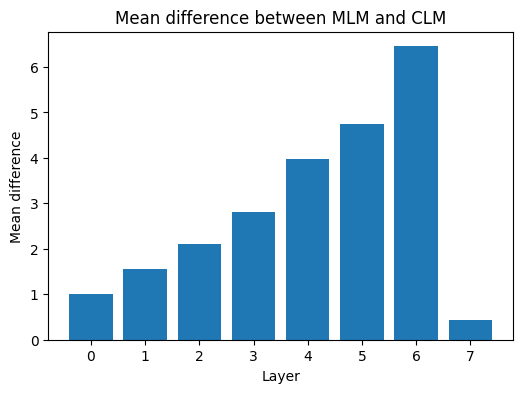

In [68]:
diff_lower = get_diff_only_lower(results)
plot_diff_per_layer(diff_lower)